#CO543 - Image Processing
#E/19/155
#Lab 2

In [2]:
#importing libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# #imporot the patch for the google colab
from google.colab.patches import cv2_imshow

In [3]:
#specifying the folder in the google drive
folder_name = '/content/drive/MyDrive/CO543-Image Processing/Lab2/'

##1. Image thresholding

**Lab Task 01**<br>
Write a function to perform image thresholding using point
processing taking the image file and the threshold value from the user.

In [4]:
#function definition
def img_thresholding(img,thresholdvalue):
  ret,result = cv.threshold(img,thresholdvalue,255,cv.THRESH_BINARY)

  return result


In [5]:
#lets import an image from the google drive
img = cv.imread(folder_name + 'high_contrast.tif',0)
img

array([[  0,   0,   0, ..., 102, 102,  89],
       [  0,   0,   0, ...,  94,  97,  81],
       [  0,   0,   0, ...,  71,  75,  57],
       ...,
       [ 24,   0,   0, ..., 201, 193, 192],
       [ 32,  11,   0, ..., 192, 187, 176],
       [ 45,  23,   0, ..., 184, 183, 162]], dtype=uint8)

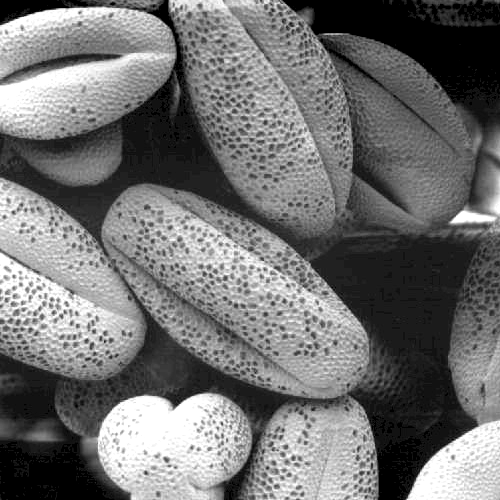

In [6]:
#display the loaded img
cv2_imshow(img)

In [7]:
#lets apply the function to the image
threshold_img = img_thresholding(img,127)
threshold_img

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

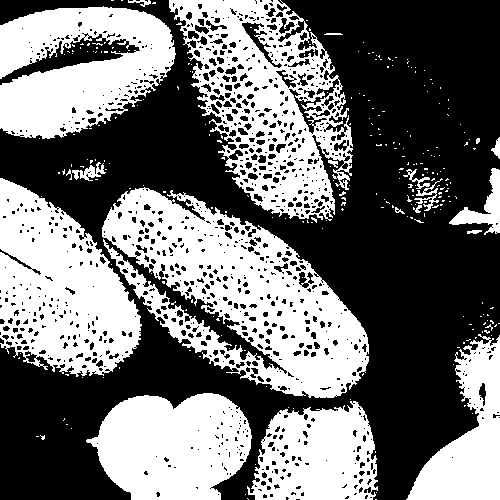

In [8]:
#view the image
cv2_imshow(threshold_img)

This is the input


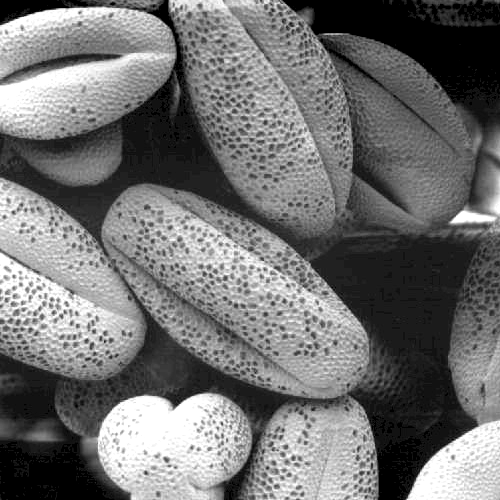


This is the output


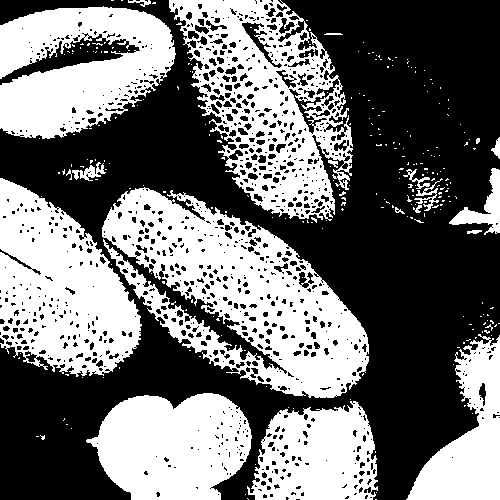

In [9]:
#comparison between the input and the output
print("This is the input")
cv2_imshow(img)
print("\nThis is the output")
cv2_imshow(threshold_img)


##2. Image arithmetic operations

**Lab Task 02**<br>
 Read two images and perform addition and subtraction.


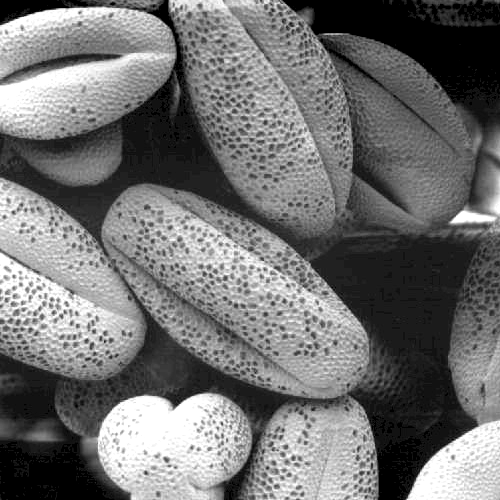

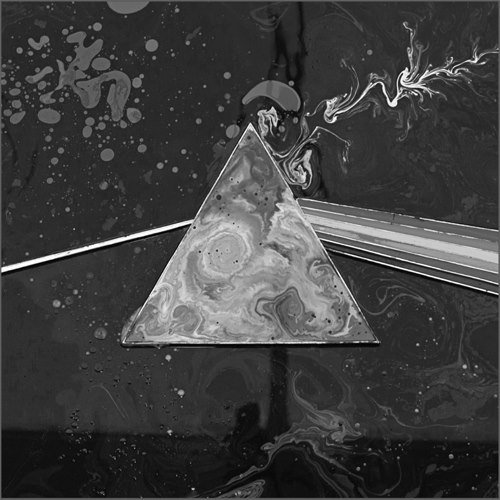

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8),
 array([105,  96,  97, 102,  99,  97,  99, 100, 100,  96], dtype=uint8))

In [10]:
#loading two images
img_1 = cv.imread(folder_name + 'high_contrast.tif',0)
img_2 = cv.imread(folder_name + 'prism.jpg',0)

#display two images
cv2_imshow(img_1)
cv2_imshow(img_2)

#inspect the values in the first two rows
img_1[0,:10],img_2[0,:10]

In [11]:
#addtion using normal matrix addtion
add_img = img_1 + img_2

#inspect the values in the first two rows
add_img[0,:10]

array([105,  96,  97, 102,  99,  97,  99, 100, 100,  96], dtype=uint8)

In [12]:
#substraction using normal matrix substraction
sub_img = img_1 - img_2

#inspect the values in the first two rows
sub_img[0,:10]

array([151, 160, 159, 154, 157, 159, 157, 156, 156, 160], dtype=uint8)

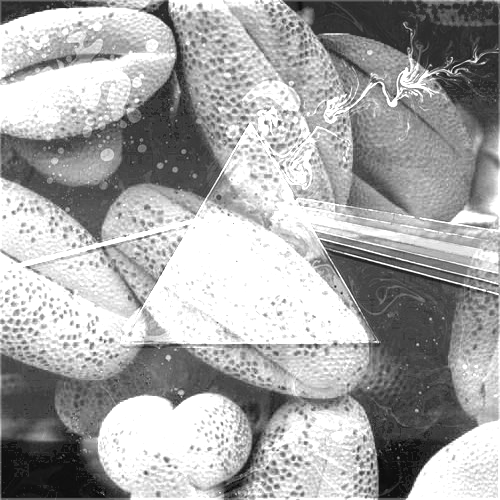

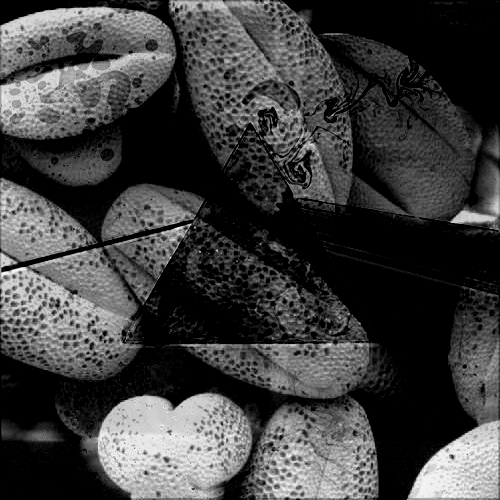

In [13]:
#use inbuilt functions
inbuilt_add = cv.add(img_1,img_2)
cv2_imshow(inbuilt_add)

inbuilt_sub = cv.subtract(img_1,img_2)
cv2_imshow(inbuilt_sub)

Note : **There is a difference between in-built addition and the normal matrix addition.**<br>
1.If we use normal addition, if the addition is greater than 255, then the resulting pixel will have addition-255 value(so the modulus of the addition by 255 is taken). This is becuase, matrix is typecasted to have unt8. That means only values from 0 to 255 are allowed.<br>
2.If we use in-built method, if the addition is greater than 255, the resulting pixel will always have the intensity as 255.

This is also the case for substraction as well.

Input image 1


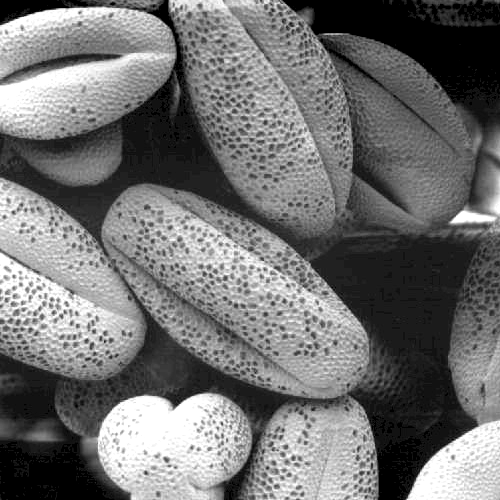


Input image 2


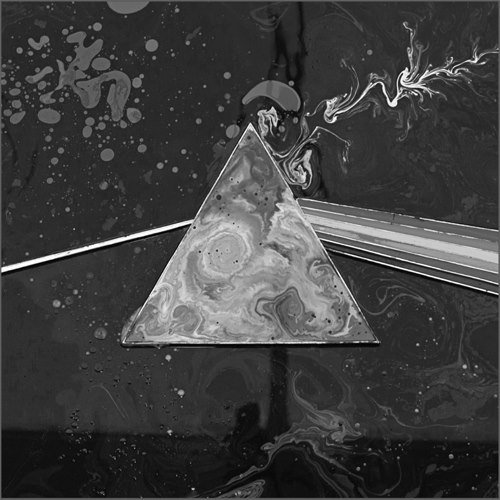


Addition of the inputs


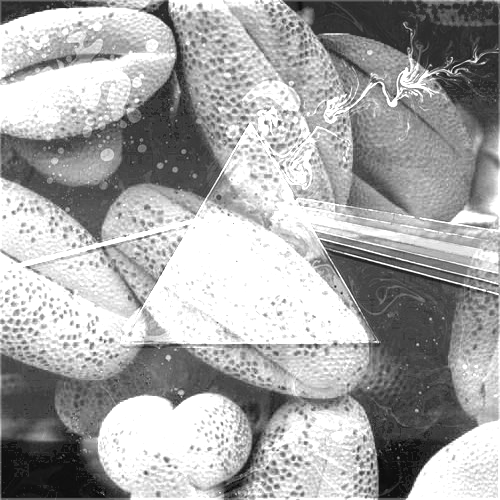


Substraction of the outputs


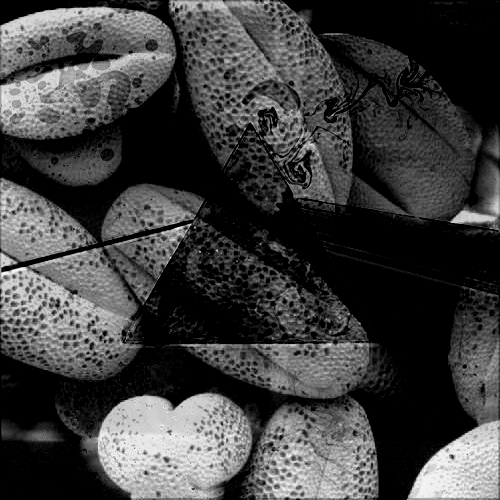

In [14]:
#lets compare inputs and outputs
print("Input image 1")
cv2_imshow(img_1)
print("\nInput image 2")
cv2_imshow(img_2)
print("\nAddition of the inputs")
cv2_imshow(inbuilt_add)
print("\nSubstraction of the outputs")
cv2_imshow(inbuilt_sub)

##3. Spatial Processing

1. Write simple programs to demonstrate the following. Show the original and
resultant images in the same figure to compare them easily.<br>
a. Log transformation<br>
b. Power transformation<br>
c. Contrast Stretching<br>
d. Gray level slicing<br>
e. Bit plane slicing<br>


###1.Log transformation

In [15]:
#function definition
def log_transform(img):
  c = 255 / np.log(1+np.max(img))
  log_img = c * (np.log(img)+1)

  log_img = np.array(log_img,dtype=np.uint8)

  return log_img

In [16]:
#apply the transform to the image
log_img = log_transform(img_2)

#lets compare the image and the results
log_img,img_2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


(array([[  4, 255,   0, ..., 255,   2,   4],
        [255, 245, 238, ..., 240, 247, 253],
        [255, 238, 220, ..., 232, 245, 253],
        ...,
        [254, 229, 200, ..., 213, 235, 253],
        [  3, 250, 246, ..., 244, 251,   3],
        [  1, 253, 254, ..., 255,   1,   4]], dtype=uint8),
 array([[105,  96,  97, ...,  95, 101, 106],
        [ 94,  76,  66, ...,  69,  80,  90],
        [ 96,  66,  44, ...,  57,  76,  91],
        ...,
        [ 93,  54,  29, ...,  38,  61,  91],
        [103,  85,  78, ...,  74,  87, 103],
        [ 99,  91,  92, ...,  94, 100, 106]], dtype=uint8))

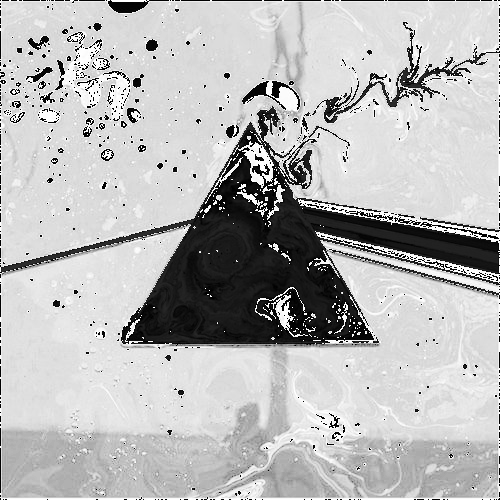

In [17]:
#display the result
cv2_imshow(log_img)

Input image


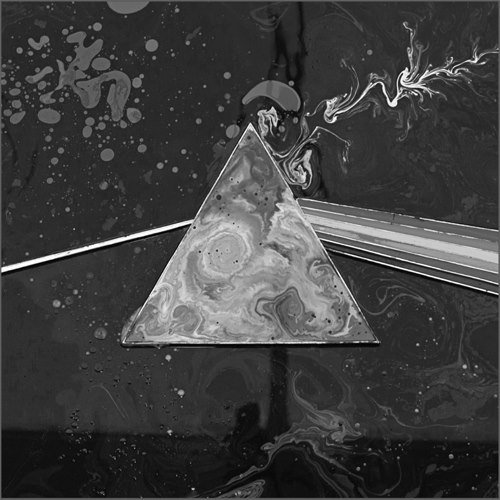


Output image


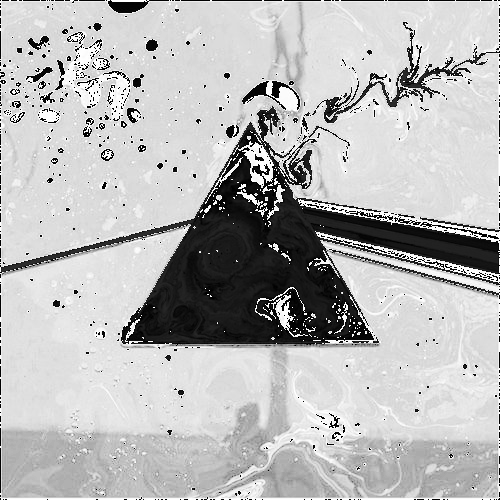

In [18]:
#lets compare inputs and outputs
print("Input image")
cv2_imshow(img_2)
print("\nOutput image")
cv2_imshow(log_img)

###2.Power transformation

In [66]:
#function definition
def powerTransformation(img, gamma):

  #stores the lookuptable
  lookUpTable = np.empty((1,256), np.uint8)

  #assign values to lookup table
  for i in range(256):
    #np.clip will clip values from 0 to 255
    lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)

  #return the resulting function after applying look-up table
  return cv.LUT(img, lookUpTable)


Input image


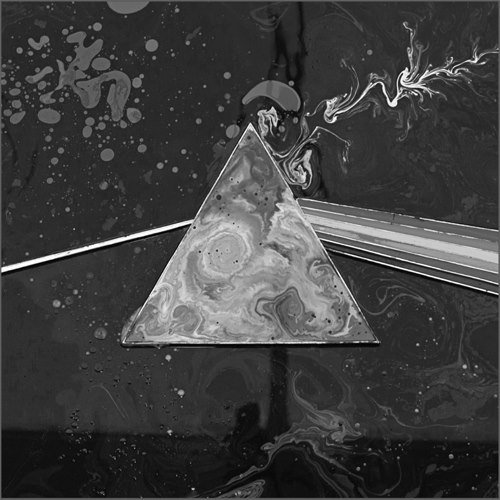


Output image


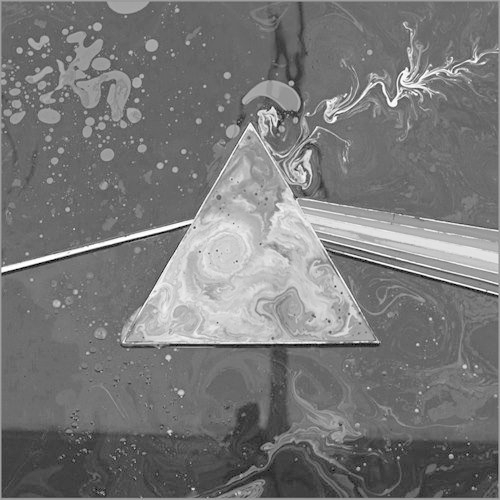

In [68]:
#lets compare inputs and outputs
print("Input image")
cv2_imshow(img_2)
print("\nOutput image")
cv2_imshow(powerTransformation(img_2,0.5))

###3.Contrast Stretching

In [71]:
#function definition for contrast streaching each pixel
def contrastStretching(pixel_value, r1, s1, r2, s2):
    
    #using the first linaer function
    if (0 <= pixel_value and pixel_value <= r1):
        return int((s1 / r1) * pixel_value)

    #using the second linaer function
    elif (r1 < pixel_value and pixel_value <= r2):
        return int(((s2 - s1)/(r2 - r1)) * (pixel_value - r1) + s1)
    
    #using the third linaer function
    else:
        return int(((255 - s2)/(255 - r2)) * (pixel_value - r2) + s2)

#function definition for contrast streacthing an image
def contrast_strehing(img, r1, s1, r2, s2):
  #verctorizing
  vector_for_contrast_streatching = np.vectorize(contrastStretching)

  #apply image
  contrastStretchedImg = vector_for_contrast_streatching(img_2, r1, s1, r2, s2)

  return contrastStretchedImg

In [77]:
#applying functions
contrast_streched_img = contrast_strehing(img_2, 80, 10, 100, 200)

Input image


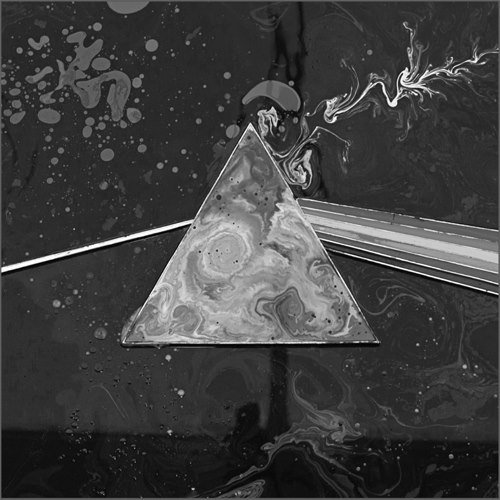


Output image


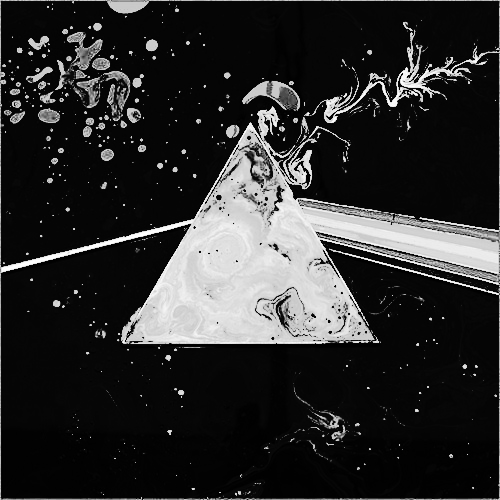

In [78]:
#lets compare inputs and outputs
print("Input image")
cv2_imshow(img_2)
print("\nOutput image")
cv2_imshow(contrast_streched_img)

###4.Grey Level Slicing

In [79]:
#function definition for grey slicing each pixel
def greySlicing(pixel, A, B, T):

  #if the pixel is within the given period
  #increase it by given height
  if(A <= pixel <= B):
    return pixel + T
  
  #otherwise return without incrementing
  return pixel

#wrapper function to apply that to an image
def grey_slicing(img,A,B,T):

  # Vectorising
  vector = np.vectorize(greySlicing)

  #Applying for the image
  grey_sliced_img = vector(img, A, B, T)

  return grey_sliced_img


In [82]:
#applying functions
grey_sliced_img = grey_slicing(img_2, 80, 150,150)

Input image


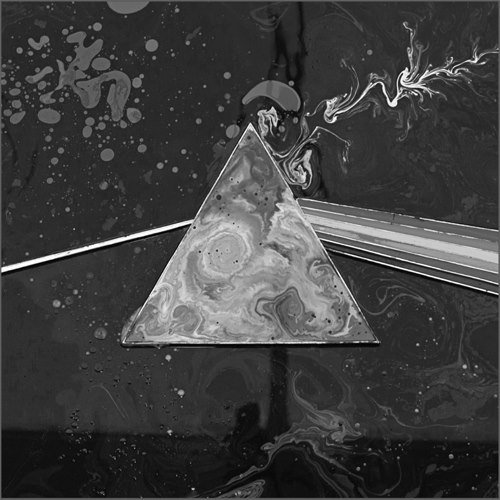


Output image


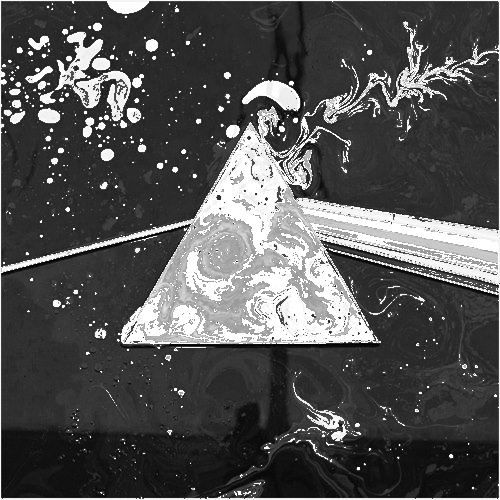

In [83]:
#lets compare inputs and outputs
print("Input image")
cv2_imshow(img_2)
print("\nOutput image")
cv2_imshow(grey_sliced_img)

###5.Bit Plane Slicing

In [85]:
# function definition for biplane slicing each pixel
def bitPlaneSlicing(pixel, bit):

  #checking if the given pixel have 1 in the given bit
  if( pixel & (1 << (bit - 1))):
    return pixel
  
  #if not return 0
  return 0

#wrapper function to apply that to an image
def bit_plane_slicing(img,bit):

  # Vectorising
  vector = np.vectorize(bitPlaneSlicing)

  #Applying for the image
  bit_plane_sliced_img = vector(img,bit)

  return bit_plane_sliced_img


In [86]:
#applying functions
bit_plane_sliced_img = bit_plane_slicing(img_2,4)

Input image


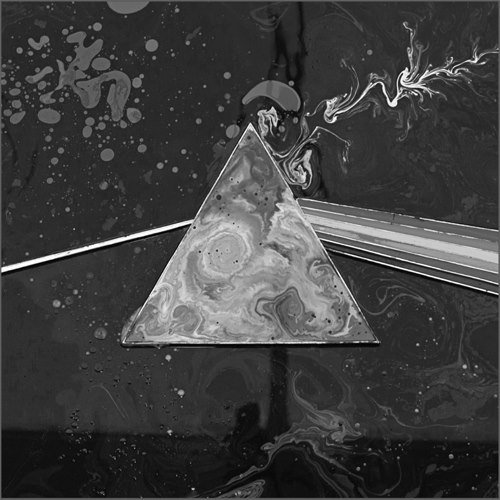


Output image


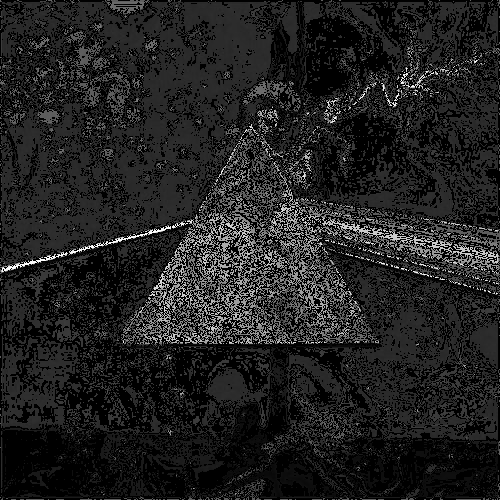

In [87]:
#lets compare inputs and outputs
print("Input image")
cv2_imshow(img_2)
print("\nOutput image")
cv2_imshow(bit_plane_sliced_img)

Consider the graph for a typical transformation function used for Contrast
Stretching in the given figure and determine the behavior of the function with
respect to given changes.


a. When r1 =s1 and r2=s2

Input image


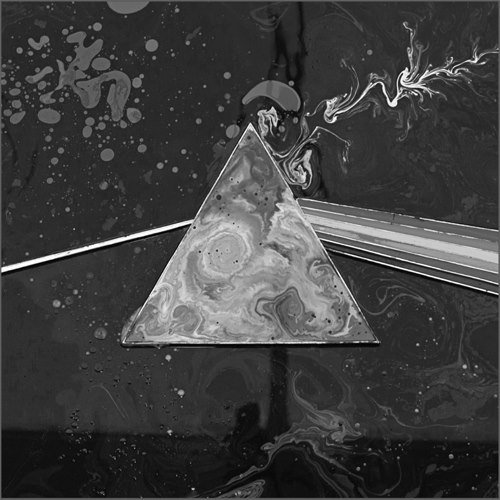


Output image


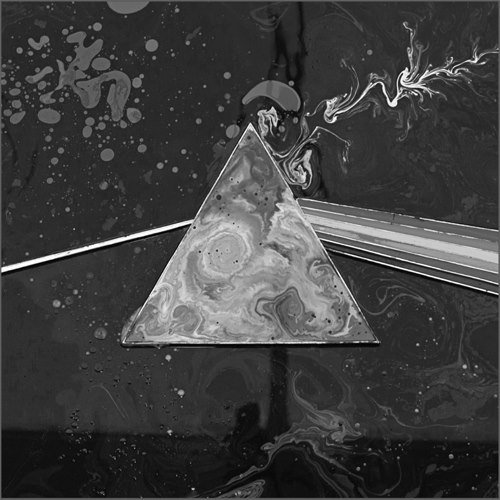

In [88]:
#apply the transformation
contrast_streched_img = contrast_strehing(img_2, 80, 80, 100, 100)

#see the changes
print("Input image")
cv2_imshow(img_2)
print("\nOutput image")
cv2_imshow(contrast_streched_img)

Therefore , when r1=s1 and r2=s2 since the two points matches with each other this will not do any effects to the original image

b. When r1=r2, s1=0 and s2=L-1


Input image


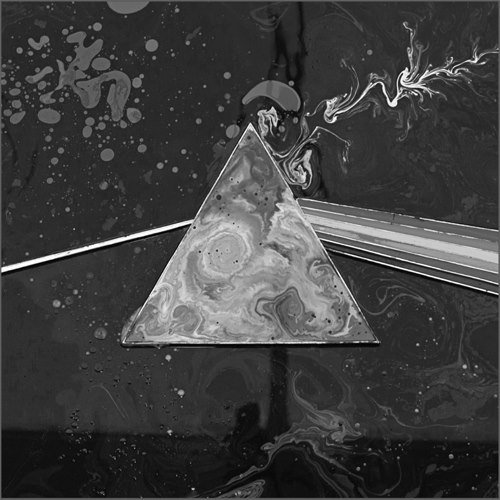


Output image


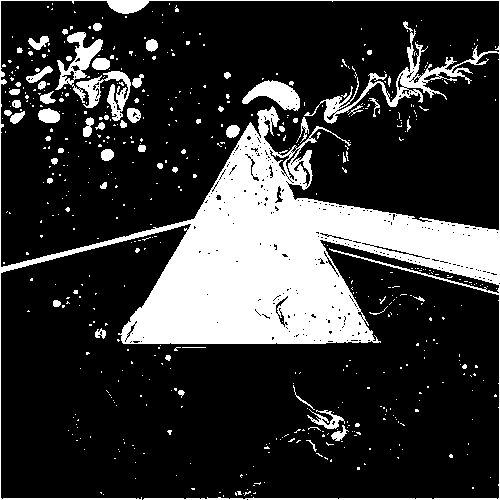

In [89]:
#apply the transformation
contrast_streched_img = contrast_strehing(img_2, 80, 0, 80, 255)

#see the changes
print("Input image")
cv2_imshow(img_2)
print("\nOutput image")
cv2_imshow(contrast_streched_img)

Therefore when  r1=r2, s1=0 and s2=L-1 , the image intensity values changes between a certain range. This is similar to thresholding.

##4.Masking

Write a program to read any image, resize it to 256x256. Apply the
masks shown in following figures so that only the middle part of the image is
visible.

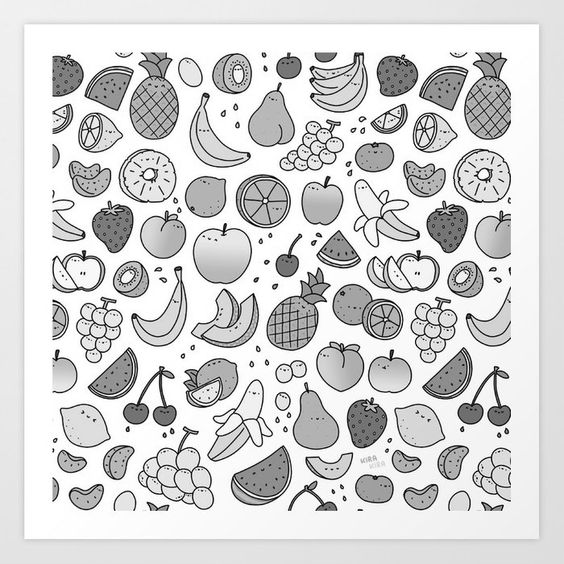

In [21]:
#lets load an image for this task
fruits_img = cv.imread(folder_name + 'fruits.jpg',0)
cv2_imshow(fruits_img)

In [22]:
#implementation of the rectangular mask
def rect_masking(img,thickness):
  
  #resizing the original image to 256x256
  resized_img = cv.resize(img,(256,256))

  #applying the rectangle mask to the image
  rect_image = cv.rectangle(resized_img, (0,0), (256,256), color=0, thickness=thickness)

  return rect_image

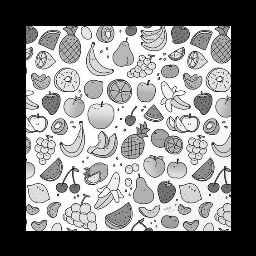

In [23]:
#see the results of rect_masking()
rect_img = rect_masking(fruits_img,50)
cv2_imshow(rect_img)

In [24]:
#implementation of the circular mask
def circular_masking(img):

  #resizing the original image to 256x256
  resized_img = cv.resize(img,(256,256))

  #applying the circular mask to the image
  circular_image  = cv.circle(resized_img, (128,128), radius=175, color=0, thickness=100)

  return circular_image

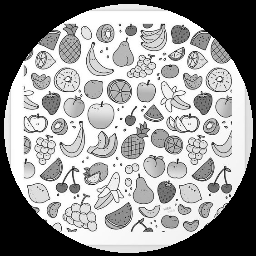

In [25]:
#see the results of circular_masking()
circular_img = circular_masking(fruits_img)
cv2_imshow(circular_img)

##5.Brightness

Write your own Python OpenCV function addbrightness() and use
it to increase brightness of a given image.(Hint: Use Image arithmetic operations)

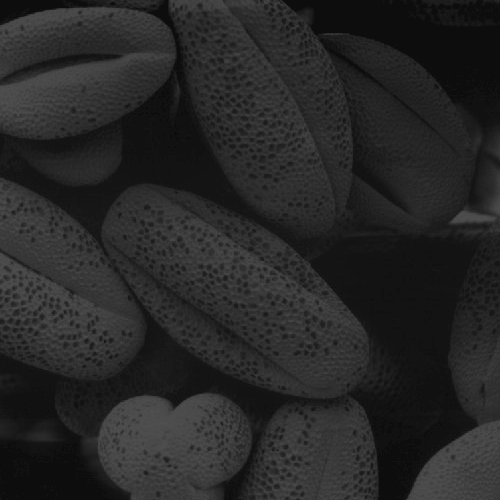

In [26]:
#lets load an image for this task
dark_img = cv.imread(folder_name + 'dark.tif',0)
cv2_imshow(dark_img)

In [27]:
#implementation of the addbrightness()
def addbrightness(img,brightness_level):
  output_img = []
  for i in img:
    row = []
    for j in i:
      newValue = j + brightness_level
      if (newValue >=255):
        newValue = 255
      row.append(newValue)
    output_img.append(np.array(row))
  return np.array(output_img)

Original Image


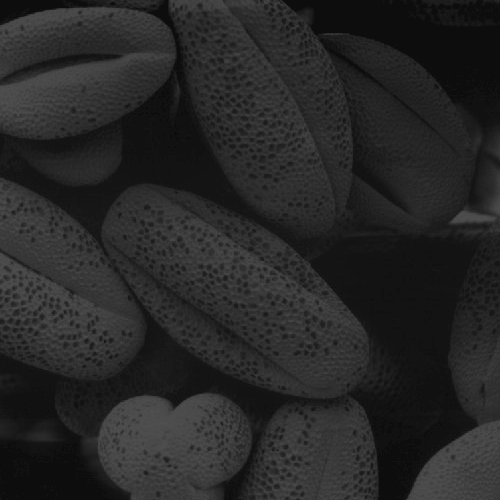


Output when brightness level is 20


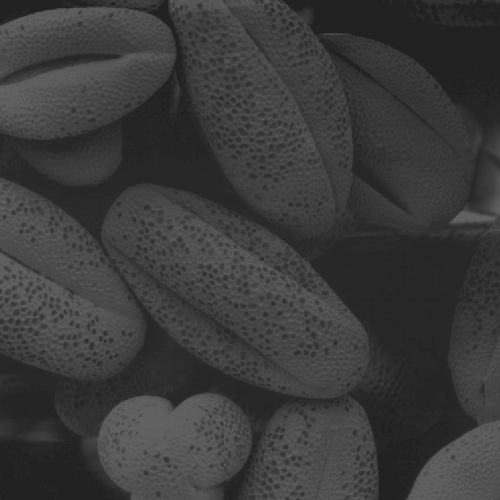


Output when brightness level is 50


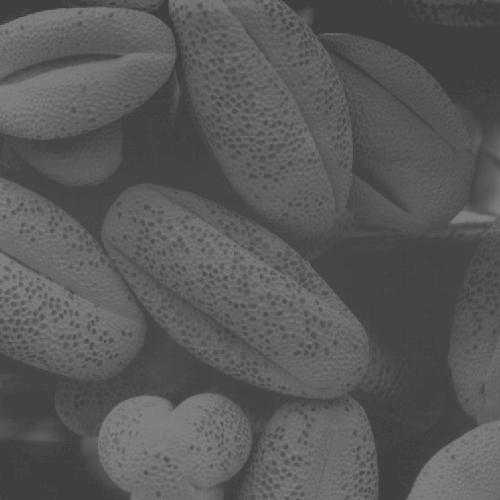


Output when brightness level is 100


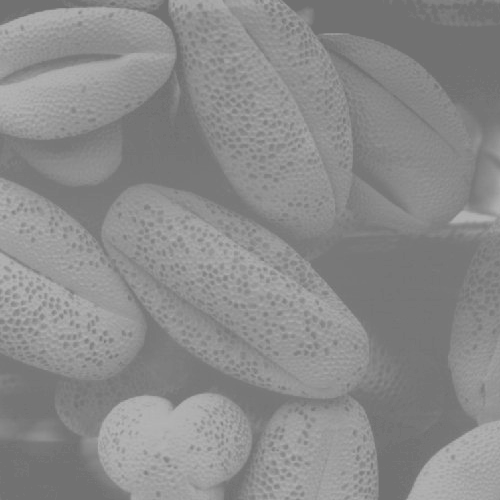

In [28]:
#show the results
print("Original Image")
cv2_imshow(dark_img)

print("\nOutput when brightness level is 20")
cv2_imshow(addbrightness(dark_img,20))

print("\nOutput when brightness level is 50")
cv2_imshow(addbrightness(dark_img,50))

print("\nOutput when brightness level is 100")
cv2_imshow(addbrightness(dark_img,100))


##6.Histogram Processing

1. Histogram Calculation in OpenCV<br>
Use inbuilt OpenCV cv2.calcHist() function to display the histogram of a given
image.<br>

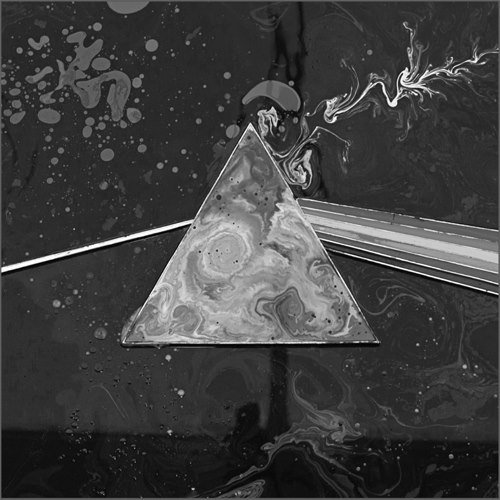

In [29]:
#below is the image for this
cv2_imshow(img_2)

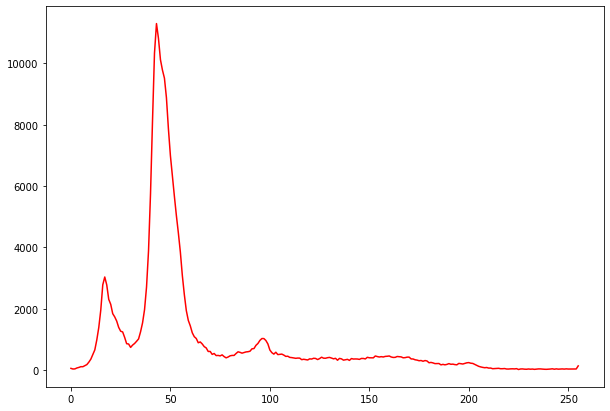

In [30]:
#showing the histogram using calcHist
plt.figure(figsize=(10,7))
histogram = cv.calcHist([img_2],[0],None,[256],[0,256]) 
plt.plot(histogram,c='red')

2. Histogram Calculation in Numpy<br>
Use inbuilt numpy np.histogram() function to display the histogram of a given
image.<br>

<BarContainer object of 20 artists>

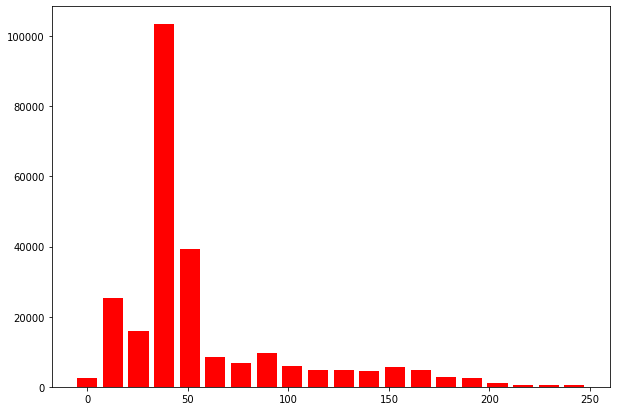

In [31]:
#showing the histogram using numpy histogram
plt.figure(figsize=(10,7))
frequency, bin = np.histogram(img_2, bins=20, range=None, normed=None, weights=None, density=None)
plt.bar(bin[:-1],frequency,width=10,color='red')

3. Then write your own histogram functions for the following scenarios<br>
a. Show a histogram plot for a grayscale image.<br>
b. Show three histograms for a given RGB image.<br>

Part a

In [32]:
#implementation for greyscale image histogram
def plot_hist_gryescale(img,number_of_bins):
  '''
    This function calculates the bin array and the frequency array of a grey 
    scaled image.

    img : the image which is to be find the histogram
    number_of_bins : bin number in the histogram
  
  '''

  #first calculate the bin array

  #get the size of one bin
  sizeOfBin = 255 / number_of_bins

  #this array stores the range of each bin
  bin_Array = np.zeros(number_of_bins+1)

  #assgin ranges of bins to the array
  for i in range(len(bin_Array)):
    bin_Array[i] = sizeOfBin*i

  #then calculate the frequency array

  #this array stores the frequency of each range
  frequency = np.zeros(number_of_bins,dtype='uint')

  #iterate through every pixel value in the image 
  for i in img:
    for j in i:

      #if the pixel intensity is 255, that pixel belongs to the last bin
      if j == 255:
        frequency[-1] += 1
        continue
      
      #for every other intensity value,
      #compare with each range and assign accordingly
      for counter in range(len(bin_Array)-1):
        if bin_Array[counter] <= j < bin_Array[counter+1]:
          frequency[counter] += 1
          continue
  
  #return the bin array and the frequency
  return bin_Array,frequency

<BarContainer object of 20 artists>

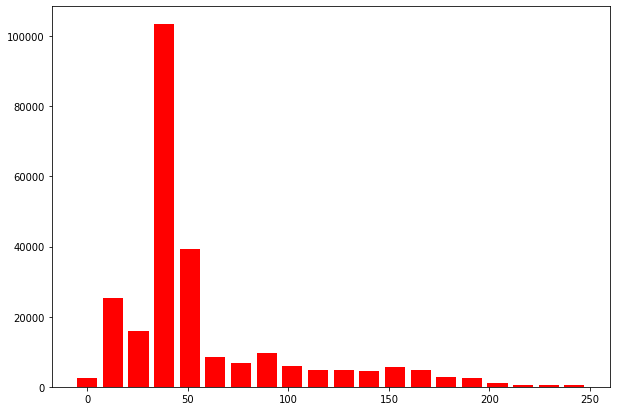

In [33]:
#get the bins and the frequencies
bin, frequency = plot_hist_gryescale(img_2,number_of_bins=20)

#showing the histogram
plt.figure(figsize=(10,7))
plt.bar(bin[:-1],frequency,width=10,color='red')

Part b

In [34]:
#implementation for rgb image histogram
def plot_hist_rgb(img,number_of_bins):
  '''
    This function calculates the bin array and the frequency array of a 
    rgb image.

    img : the image which is to be find the histogram
    number_of_bins : bin number in the histogram
  
  '''

  #first calculate the bin array

  #get the size of one bin
  sizeOfBin = 255 / number_of_bins

  #this array stores the range of each bin
  bin_Array = np.zeros(number_of_bins+1)

  #assgin ranges of bins to the array
  for i in range(len(bin_Array)):
    bin_Array[i] = sizeOfBin*i

  #then calculate the frequencies of r,g,b

  #this array stores the frequency of each range
  frequency_r = np.zeros(number_of_bins,dtype='uint')
  frequency_g = np.zeros(number_of_bins,dtype='uint')
  frequency_b = np.zeros(number_of_bins,dtype='uint')

  #iterate through every pixel value in the image 
  for i in img:
    for j in i:

      #get each color
      red = j[0]
      green = j[1]
      blue = j[2]

      #if the pixel intensity is 255, that pixel belongs to the last bin
      if red == 255:
        frequency_r[-1] += 1

      elif green == 255:
        frequency_g[-1] += 1

      elif blue == 255:
        frequency_b[-1] += 1
        
      #for every other intensity value,
      #compare with each range and assign accordingly
      for counter in range(len(bin_Array)-1):

        if bin_Array[counter] <= red < bin_Array[counter+1]:
          frequency_r[counter] += 1
          
        if bin_Array[counter] <= green < bin_Array[counter+1]:
          frequency_g[counter] += 1
          
        if bin_Array[counter] <= blue < bin_Array[counter+1]:
          frequency_b[counter] += 1
  
  #return the bin array and the frequencies of each color
  return bin_Array,frequency_r,frequency_g,frequency_b

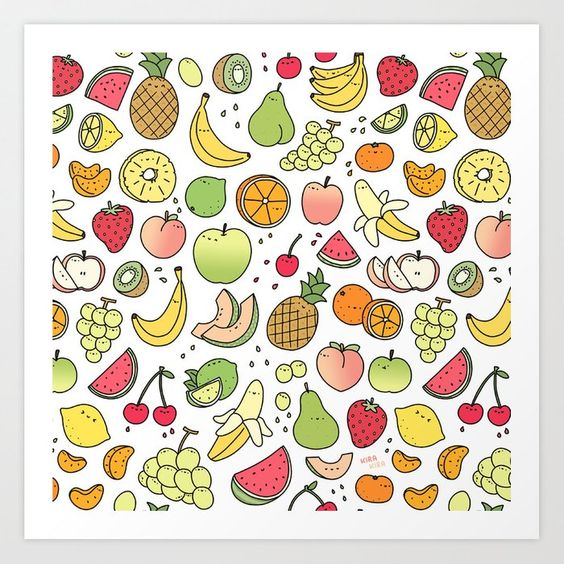

In [35]:
#let's load an image for this task
fruits_img = cv.imread(folder_name + 'fruits.jpg',1)
cv2_imshow(fruits_img)

In [41]:
#get values after applying the function
bins, red_frequency, green_freuquency, blue_frequency = plot_hist_rgb(fruits_img,number_of_bins=15)

<BarContainer object of 15 artists>

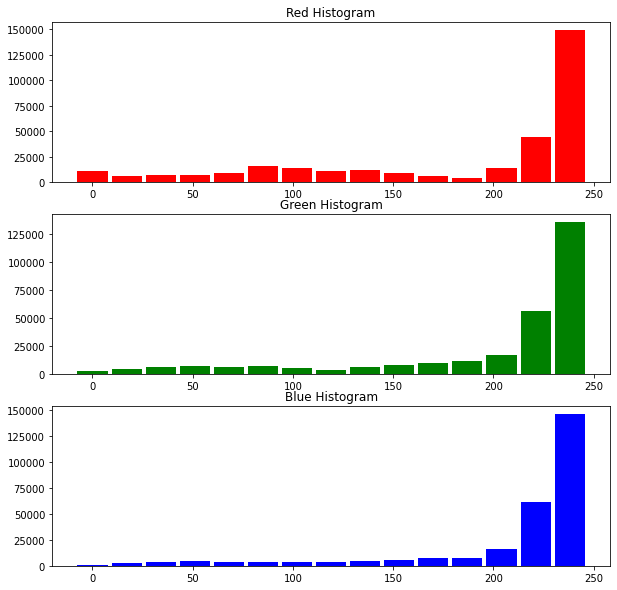

In [52]:
#plotting each histogram
plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
plt.title("Red Histogram")
plt.bar(bins[:-1],red_frequency,width=15,color='red')

plt.subplot(3,1,2)
plt.title("Green Histogram")
plt.bar(bins[:-1],green_freuquency,width=15,color='green')

plt.subplot(3,1,3)
plt.title("Blue Histogram")
plt.bar(bins[:-1],blue_frequency,width=15,color='blue')


4. Consider the four images given in the resources folder. Plot the histogram for each
image. Perform Histogram Equalization on each image and plot the histograms of
the resultant images. Comment on the results you have obtained.


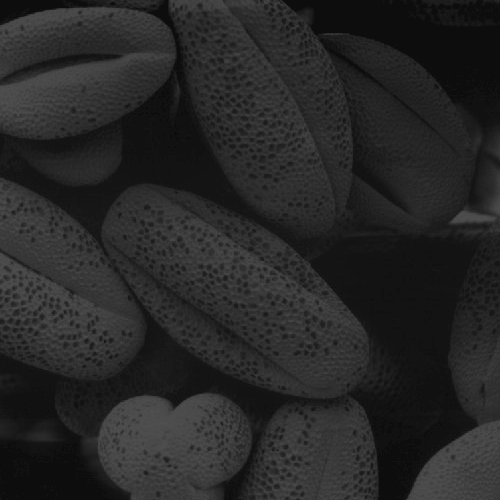

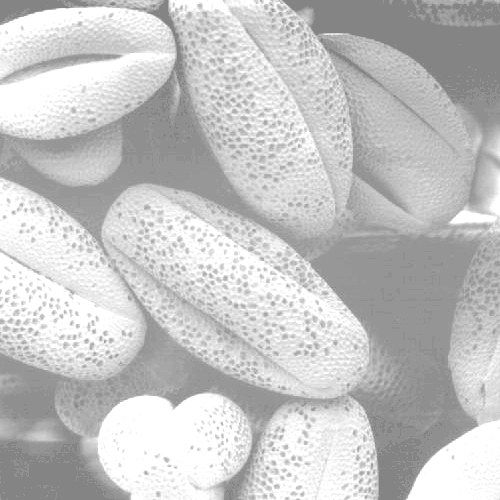

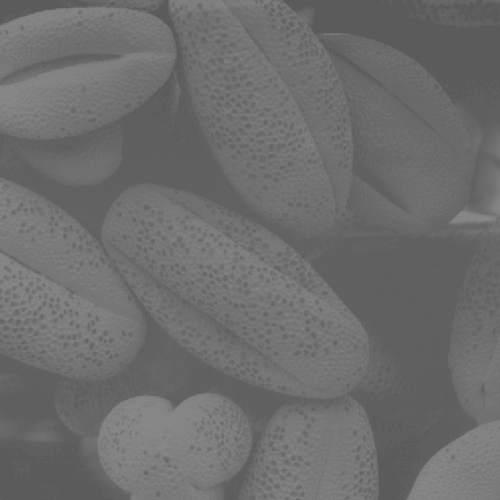

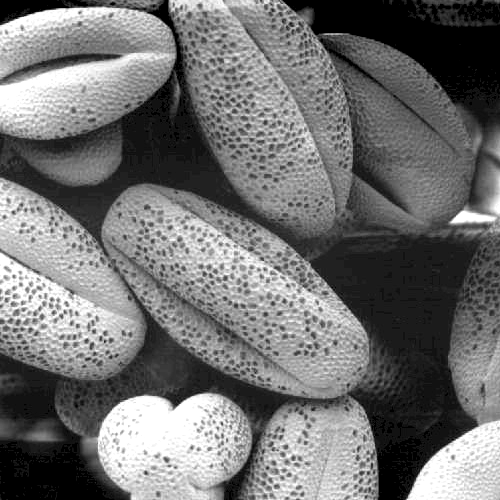

In [55]:
#first of all, let's load images from google drive
dark_img = cv.imread(folder_name + 'dark.tif',0)
bright_img = cv.imread(folder_name + 'bright.tif',0)
low_contrast_img = cv.imread(folder_name + 'low_contrast.tif',0)
high_contrast_img = cv.imread(folder_name + 'high_contrast.tif',0)

#displaying images
cv2_imshow(dark_img)
cv2_imshow(bright_img)
cv2_imshow(low_contrast_img)
cv2_imshow(high_contrast_img)

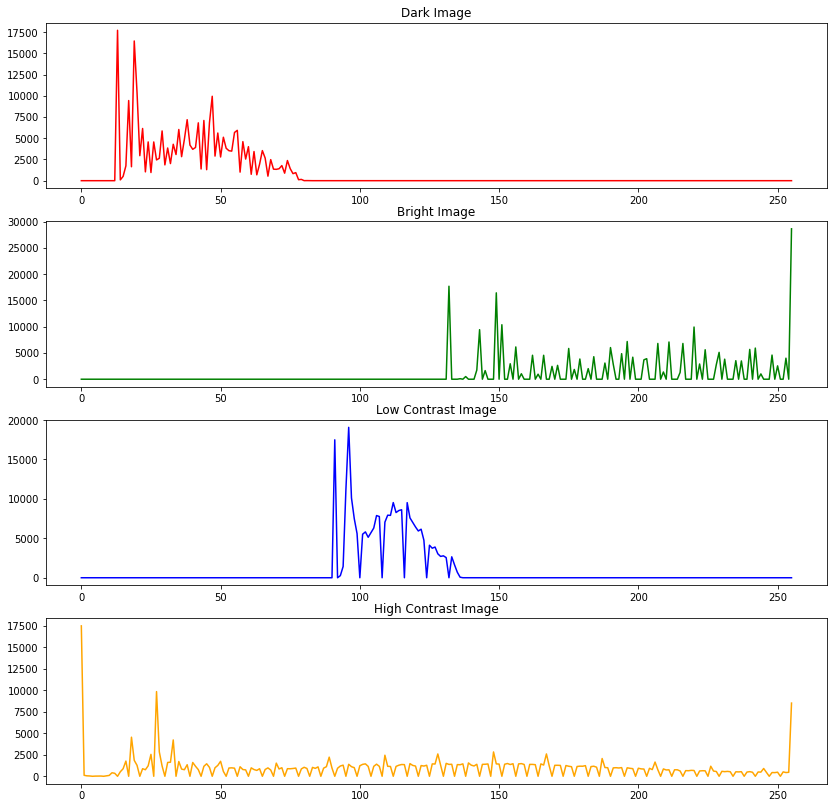

In [64]:
#plotting histogram for each image
plt.figure(figsize=(14,14))

plt.subplot(4,1,1)
plt.title("Dark Image")
histogram1 = cv.calcHist([dark_img],[0],None,[256],[0,256]) 
plt.plot(histogram1,c='red')

plt.subplot(4,1,2)
plt.title("Bright Image")
histogram2 = cv.calcHist([bright_img],[0],None,[256],[0,256]) 
plt.plot(histogram2,c='green')

plt.subplot(4,1,3)
plt.title("Low Contrast Image")
histogram3 = cv.calcHist([low_contrast_img],[0],None,[256],[0,256]) 
plt.plot(histogram3,c='blue')

plt.subplot(4,1,4)
plt.title("High Contrast Image")
histogram4 = cv.calcHist([high_contrast_img],[0],None,[256],[0,256]) 
plt.plot(histogram4,c='orange')

Performing eqaliztion on the dark image


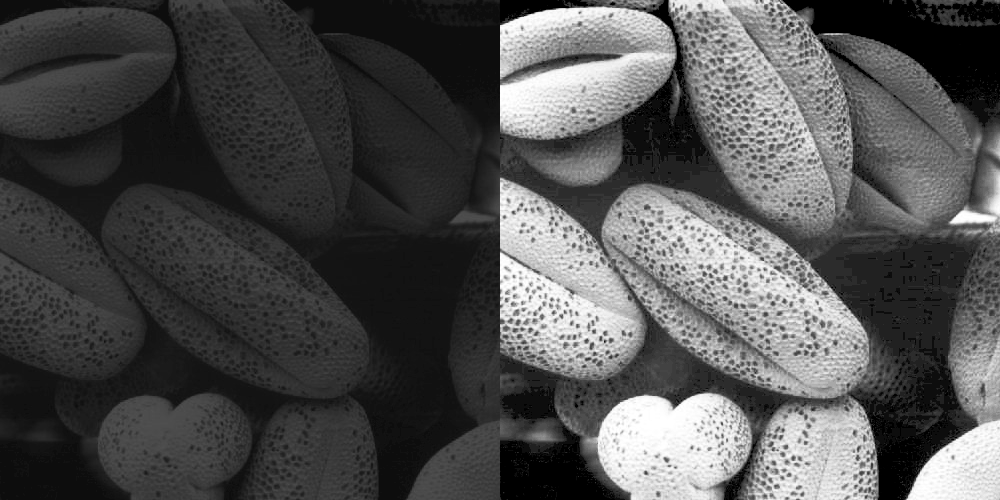


Performing eqaliztion on the bright image


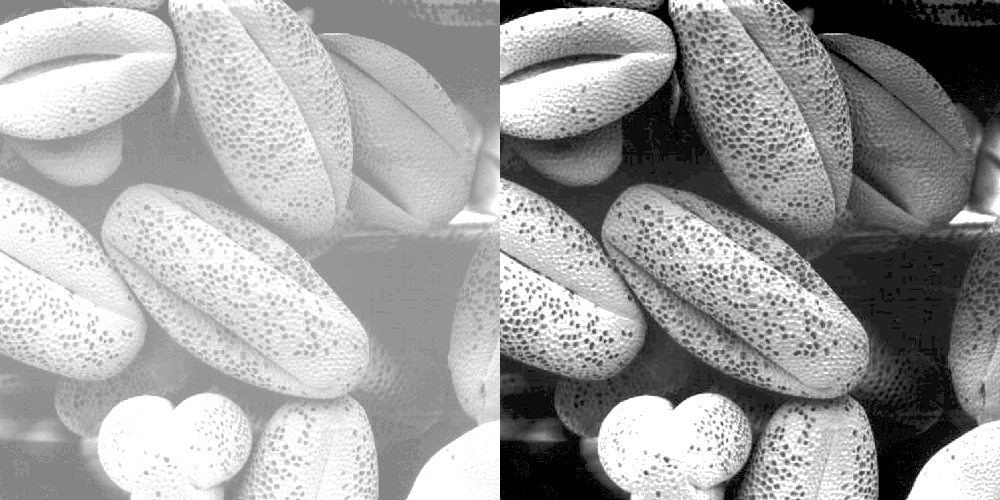


Performing eqaliztion on the low contrast image


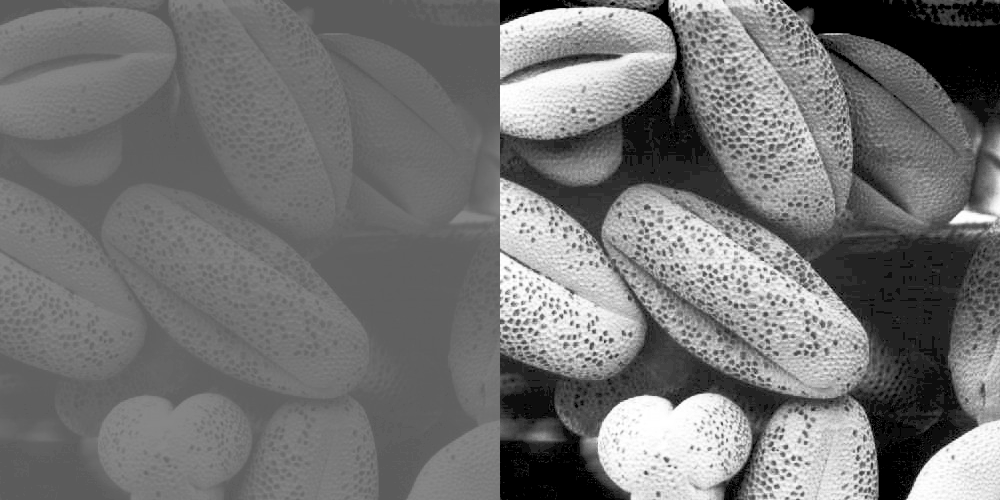


Performing eqaliztion on the high contrast image


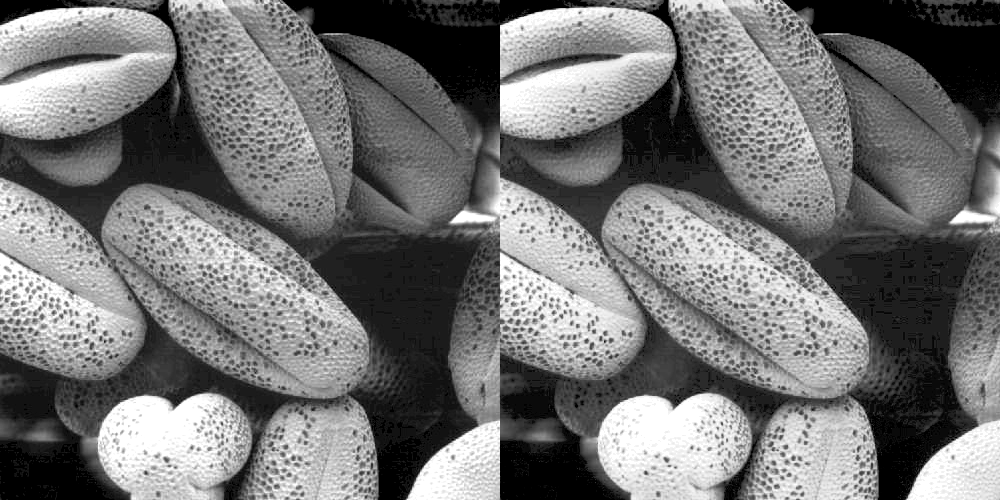

In [60]:
#performing eqalization and plotting input and output after perfroming equalization

print("Performing eqaliztion on the dark image")
equlized_dark = cv.equalizeHist(dark_img)
result1 = np.hstack((dark_img,equlized_dark))
cv2_imshow(result1)

print("\nPerforming eqaliztion on the bright image")
equlized_bright = cv.equalizeHist(bright_img)
result2 = np.hstack((bright_img,equlized_bright))
cv2_imshow(result2)

print("\nPerforming eqaliztion on the low contrast image")
equlized_low_contrast = cv.equalizeHist(low_contrast_img)
result3 = np.hstack((low_contrast_img,equlized_low_contrast))
cv2_imshow(result3)

print("\nPerforming eqaliztion on the high contrast image")
equlized_high_contrast = cv.equalizeHist(high_contrast_img)
result4 = np.hstack((high_contrast_img,equlized_high_contrast))
cv2_imshow(result4)

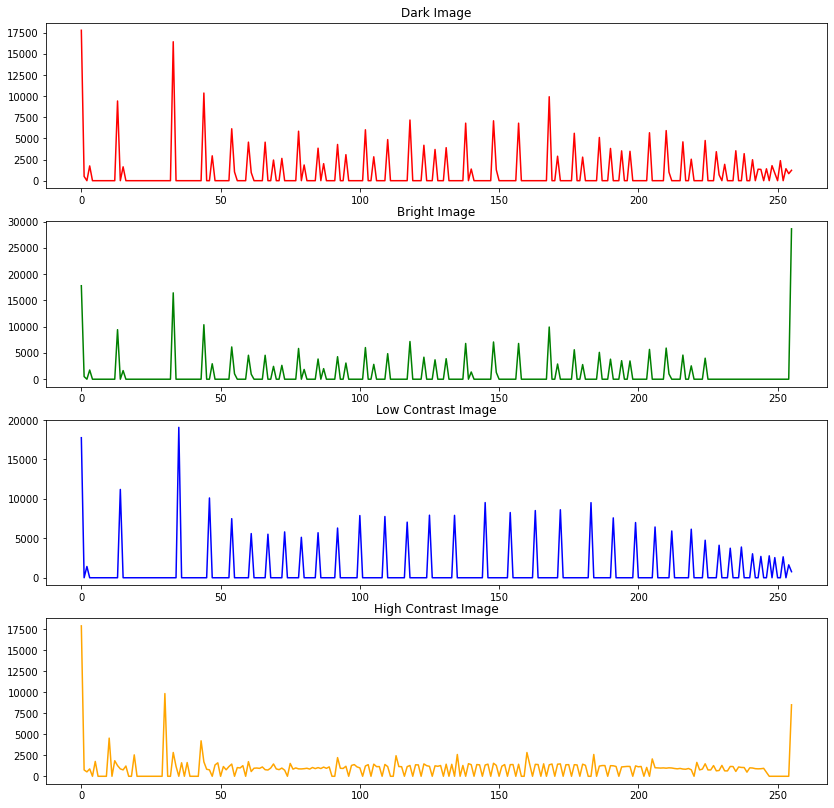

In [65]:
#plotting histogram for each image after applying image equalization
plt.figure(figsize=(14,14))

plt.subplot(4,1,1)
plt.title("Dark Image")
histogram1 = cv.calcHist([equlized_dark],[0],None,[256],[0,256]) 
plt.plot(histogram1,c='red')

plt.subplot(4,1,2)
plt.title("Bright Image")
histogram2 = cv.calcHist([equlized_bright],[0],None,[256],[0,256]) 
plt.plot(histogram2,c='green')

plt.subplot(4,1,3)
plt.title("Low Contrast Image")
histogram3 = cv.calcHist([equlized_low_contrast],[0],None,[256],[0,256]) 
plt.plot(histogram3,c='blue')

plt.subplot(4,1,4)
plt.title("High Contrast Image")
histogram4 = cv.calcHist([equlized_high_contrast],[0],None,[256],[0,256]) 
plt.plot(histogram4,c='orange')

####Observations
Before equalizing, images had colors which is limited to only a potion of range of the histogram.<br>

But after performing the eqalization,the resulting images have histograms with well spread frquencies over the full range of the histogram. This will result in much better contrast in the output image.